In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data_df = pd.merge(clinical_trial_df, mouse_drug_df,
                                 how='left', on='Mouse ID')

# Display the data table for preview
combined_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Average_Tumor_Vol_by_Drug_and_TP = combined_data_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']

# Convert to DataFrame
Tumor_Vol_by_Drug_and_TP_df = pd.DataFrame(Average_Tumor_Vol_by_Drug_and_TP)
Tumor_Vol_by_Drug_and_TP_df = Tumor_Vol_by_Drug_and_TP_df.reset_index()

# Preview DataFrame
Tumor_Vol_by_Drug_and_TP_df.head(20)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Standard_Error_Tumor_Vol_by_Drug_and_TP = combined_data_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
Standard_Error_Tumor_Vol_by_Drug_and_TP_df = pd.DataFrame(Standard_Error_Tumor_Vol_by_Drug_and_TP).reset_index()

# Preview DataFrame
Standard_Error_Tumor_Vol_by_Drug_and_TP_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames

Tumor_Vol_by_Drug_and_TP_df=Tumor_Vol_by_Drug_and_TP_df.pivot(index= 'Timepoint', columns= 'Drug', values= 'Tumor Volume (mm3)')

Standard_Error_Tumor_Vol_by_Drug_and_TP_df = Standard_Error_Tumor_Vol_by_Drug_and_TP_df.pivot(index= 'Timepoint', columns= 'Drug', values= 'Tumor Volume (mm3)')


# Preview that Reformatting worked

Tumor_Vol_by_Drug_and_TP_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


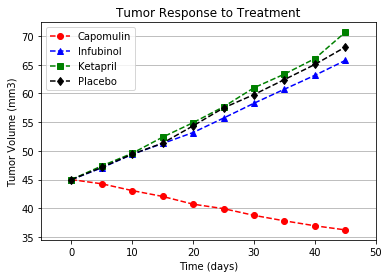

In [5]:
# Generate the Plot (with Error Bars)
Cap = Tumor_Vol_by_Drug_and_TP_df['Capomulin']
Cap_Error = Standard_Error_Tumor_Vol_by_Drug_and_TP_df['Capomulin']
Inf = Tumor_Vol_by_Drug_and_TP_df['Infubinol']
Cap_Error = Standard_Error_Tumor_Vol_by_Drug_and_TP_df['Infubinol']
Ket = Tumor_Vol_by_Drug_and_TP_df['Ketapril']
Cap_Error = Standard_Error_Tumor_Vol_by_Drug_and_TP_df['Ketapril']
Pla = Tumor_Vol_by_Drug_and_TP_df['Placebo']
Cap_Error = Standard_Error_Tumor_Vol_by_Drug_and_TP_df['Placebo']

plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')
plt.xlim(-5,50)
plt.grid(axis= 'y')

plt.plot(Cap, 'ro--', label='Capomulin')
#plt.plot(Cap, 'ro--',label= 'Capomulin', yerr=Cap_Error)
plt.plot(Inf,'b^--',label='Infubinol')
plt.plot(Ket,'gs--',label="Ketapril")
plt.plot(Pla,'kd--', label="Placebo")
plt.legend()

# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Average_Met_Site_by_Drug_and_TP = combined_data_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']

# Convert to DataFrame
Met_Site_by_Drug_and_TP_df = pd.DataFrame(Average_Met_Site_by_Drug_and_TP)
Met_Site_by_Drug_and_TP_df = Met_Site_by_Drug_and_TP_df.reset_index()

# Preview DataFrame
Met_Site_by_Drug_and_TP_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Standard_Error_Met_Site_by_Drug_and_TP = combined_data_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
Standard_Error_Met_Site_by_Drug_and_TP_df = pd.DataFrame(Standard_Error_Met_Site_by_Drug_and_TP).reset_index()

# Preview DataFrame
Standard_Error_Met_Site_by_Drug_and_TP_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
Met_Site_by_Drug_and_TP_df = Met_Site_by_Drug_and_TP_df.pivot(index= 'Timepoint', columns= 'Drug', values= 'Metastatic Sites')

Standard_Error_Met_Site_by_Drug_and_TP_df = Standard_Error_Met_Site_by_Drug_and_TP_df.pivot(index= 'Timepoint', columns= 'Drug', values= 'Metastatic Sites')

# Preview that Reformatting worked
Met_Site_by_Drug_and_TP_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


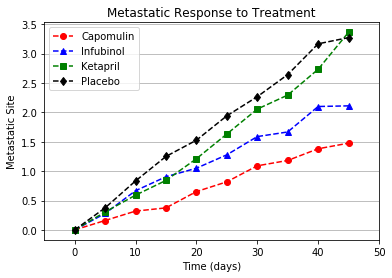

In [9]:
# Generate the Plot (with Error Bars)
Cap = Met_Site_by_Drug_and_TP_df['Capomulin']
Cap_Error = Standard_Error_Met_Site_by_Drug_and_TP_df['Capomulin']
Inf = Met_Site_by_Drug_and_TP_df['Infubinol']
Cap_Error = Standard_Error_Met_Site_by_Drug_and_TP_df['Infubinol']
Ket = Met_Site_by_Drug_and_TP_df['Ketapril']
Cap_Error = Standard_Error_Met_Site_by_Drug_and_TP_df['Ketapril']
Pla = Met_Site_by_Drug_and_TP_df['Placebo']
Cap_Error = Standard_Error_Met_Site_by_Drug_and_TP_df['Placebo']

plt.xlabel('Time (days)')
plt.ylabel('Metastatic Site')
plt.title('Metastatic Response to Treatment')
plt.xlim(-5,50)
plt.grid(axis= 'y')

plt.plot(Cap, 'ro--', label='Capomulin')
#plt.plot(Cap, 'ro--',label= 'Capomulin', yerr=Cap_Error)
plt.plot(Inf,'b^--',label='Infubinol')
plt.plot(Ket,'gs--',label="Ketapril")
plt.plot(Pla,'kd--', label="Placebo")
plt.legend()

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [22]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Count_by_Drug_and_TP = combined_data_df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()

# Convert to DataFrame
Count_by_Drug_and_TP_df = pd.DataFrame(Count_by_Drug_and_TP)
Count_by_Drug_and_TP_df = pd.DataFrame(Count_by_Drug_and_TP).reset_index()

# Preview DataFrame
Count_by_Drug_and_TP_df.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)